In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd

In [2]:
import getpass
password = getpass.getpass() # to get the password without being visible

········


In [5]:
connection_string = "mysql+pymysql://root:" + password + "@localhost/sakila"
engine = create_engine(connection_string)

In [8]:
df = pd.read_sql_query("select * from film_rents", engine)
df.head()

,title,filmsrented,avgrental_rate,Avg_Days_Rented,filmmonthyear,filmyear,filmmonth
0,ACADEMY DINOSAUR,9,0.99,4.7778,07-2005,2005,07
1,ACADEMY DINOSAUR,9,0.99,5.0000,08-2005,2005,08
2,ACADEMY DINOSAUR,2,0.99,5.5000,05-2005,2005,05
3,ACADEMY DINOSAUR,3,0.99,6.0000,06-2005,2005,06
4,ACE GOLDFINGER,4,4.99,6.2500,08-2005,2005,08


In [9]:
df.isna().sum()

title                0
filmsrented          0
avgrental_rate       0
Avg_Days_Rented    168
filmmonthyear        0
filmyear             0
filmmonth            0
dtype: int64

In [11]:
df= df[-df["Avg_Days_Rented"].isna()]

In [12]:
df.isna().sum()

title              0
filmsrented        0
avgrental_rate     0
Avg_Days_Rented    0
filmmonthyear      0
filmyear           0
filmmonth          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3502 entries, 0 to 3669
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3502 non-null   object 
 1   filmsrented      3502 non-null   int64  
 2   avgrental_rate   3502 non-null   float64
 3   Avg_Days_Rented  3502 non-null   float64
 4   filmmonthyear    3502 non-null   object 
 5   filmyear         3502 non-null   object 
 6   filmmonth        3502 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 218.9+ KB


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
corr_matrix = df.corr()

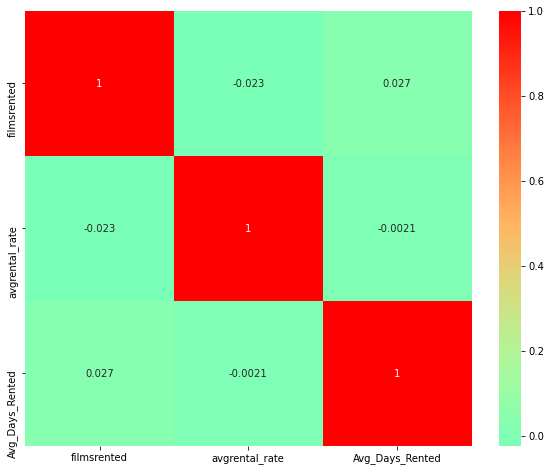

In [19]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, cmap ="rainbow", center = 0, annot = True);

### No highly correlated values

In [20]:
import numpy as np
from sklearn.preprocessing import Normalizer

X = df.select_dtypes(include = np.number)

In [22]:
transformer = Normalizer()
transformer.fit(X)
x_normalized = transformer.transform(X)

In [23]:
x = pd.DataFrame(x_normalized, columns = X.columns)
x

,filmsrented,avgrental_rate,Avg_Days_Rented
0,0.879116,0.096703,0.466694
1,0.870144,0.095716,0.483413
2,0.336956,0.166793,0.926629
3,0.442422,0.145999,0.884843
4,0.447318,0.558029,0.698935
...,...,...,...
3497,0.169176,0.505835,0.845878
3498,0.854219,0.355213,0.379650
3499,0.848044,0.384704,0.364451
3500,0.615924,0.614692,0.492739


In [24]:
cat = df.select_dtypes(include = object)

In [25]:
cat

,title,filmmonthyear,filmyear,filmmonth
0,ACADEMY DINOSAUR,07-2005,2005,07
1,ACADEMY DINOSAUR,08-2005,2005,08
2,ACADEMY DINOSAUR,05-2005,2005,05
3,ACADEMY DINOSAUR,06-2005,2005,06
4,ACE GOLDFINGER,08-2005,2005,08
...,...,...,...,...
3665,ZOOLANDER FICTION,05-2005,2005,05
3666,ZORRO ARK,07-2005,2005,07
3667,ZORRO ARK,08-2005,2005,08
3668,ZORRO ARK,06-2005,2005,06
